In [524]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
from collections import Counter as ct

In [525]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [526]:
# dtsc didefinisikan sebagai data induk dari semua pengolahan data
# semua dataframe lain diawali dengan "dtsc_"
dtsc = pd.read_csv('ReviewGameMetacritic_clean.csv')
dtsc

,platform,developer,releasedate,metascore
0,PC,Westwood Studios,31-Aug-95,94
1,PC,LucasArts,30-Apr-95,86
2,PS,Tamsoft,9-Sep-95,69
3,PC,MPS Labs,29-Feb-96,94
4,PC,id Software,22-Jun-96,94
5,PC,Blizzard Entertainment,31-Dec-96,94
6,N64,Nintendo,26-Sep-96,94
7,PS,Psygnosis,30-Sep-96,93
8,N64,Nintendo,1-Nov-96,92
9,PS,Core Design Ltd.,15-Nov-96,91


In [527]:
# game-game keluaran Ubisoft (Assassin's Creed, Far Cry, Watch Dogs)
dtsc_ubi2 = dtsc[dtsc["developer"].str.lower().str.contains("ubisoft")]
rows = dtsc_ubi2.shape[0]

print(dtsc_ubi2.head())
print('\nGame products (number of row), Ubisoft : ', rows) 

    platform            developer releasedate  metascore
122      N64  Ubisoft Montpellier   31-Oct-99         90
326       DC     Ubisoft Montreal   13-Dec-00         76
386       DC     Ubisoft Montreal   13-Dec-00         71
412       DC      Ubisoft Romania    5-Dec-00         69
441       PS     Ubisoft Shanghai   14-Nov-00         65

Game products (number of row), Ubisoft :  563


In [528]:
# Game-game keluaran developer Koei dan Omega Force (sebagian besar game bertema hero fighting seperti Dynasty Warrior)
dynasti = ['koei', 'omega force']
dtsc = pd.read_csv('ReviewGameMetacritic_clean.csv')
dtsc_dynasty = dtsc[dtsc["developer"].str.lower().str.contains('|'.join(dynasti))]
rows = dtsc_dynasty.shape[0]

print(dtsc_dynasty.head())
print('\nGame products (number of row), Koei & Omega Force : ', rows) 

    platform    developer releasedate  metascore
334      PS2         Koei   13-Nov-00         75
335      PS2  Omega Force   25-Oct-00         75
772      PS2  Omega Force   26-Nov-01         78
880       PS         Koei   13-Aug-01         73
896      PS2         Koei   26-Sep-01         71

Game products (number of row), Koei & Omega Force :  178


In [529]:
# Game-game keluaran developer Electronic Arts (EA)
dtsc = pd.read_csv('ReviewGameMetacritic_clean.csv')
dtsc_ubi2 = dtsc[dtsc["developer"].str.lower().str.contains("ubisoft")]
dtsc_ea1 = dtsc[dtsc["developer"].str.lower().str.contains("electronic arts")]
dtsc_ea2 = dtsc[dtsc["developer"].str.lower().str.startswith("ea ")] 
dtsc_ea = dtsc_ea1.append(dtsc_ea2)
rows = dtsc_ea.shape[0]

print(dtsc_ea.head())
print('\nGame products (number of row), EA : ', rows) 

    platform        developer releasedate  metascore
455      PS2  Electronic Arts   23-Oct-00         64
670      PS2  Electronic Arts   23-Apr-01         85
836     XBOX  Electronic Arts   18-Nov-01         76
914      PS2  Electronic Arts   29-Oct-01         70
945       PC  Electronic Arts   26-Mar-01         69

Game products (number of row), EA :  844


In [530]:
# Game-game keluaran developer untuk game-game Activision 
activsn = ['activision', 'treyarch', 'infinity ward', 'fun labs']
dtsc = pd.read_csv('ReviewGameMetacritic_clean.csv')
dtsc_actvsn = dtsc[dtsc["developer"].str.lower().str.contains('|'.join(activsn))]
rows = dtsc_actvsn.shape[0]

print(dtsc_actvsn.head())
print('\nGame products (number of row), Activision cluster : ', rows) 

    platform   developer releasedate  metascore
27        PC  Activision   30-Jun-96         59
54        PC  Activision   28-Feb-97         80
163       DC    Treyarch    6-Nov-00         97
368       PC  Activision   17-Nov-00         72
742       DC    Treyarch   19-Apr-01         80

Game products (number of row), Activision cluster :  176


In [531]:
bths = ['bethesda', 'arkane studios', 'id software', 'machinegames', 'tango gameworks']
dtsc_bth = dtsc[dtsc["developer"].str.lower().str.contains('|'.join(bths))]                                                       
rows = dtsc_bth.shape[0]

print(dtsc_bth.head())
print('\nGame products (number of row), Bethesda cluster: ', rows)

     platform           developer releasedate  metascore
4          PC         id Software   22-Jun-96         94
411        PC         id Software   18-Dec-00         69
1253       PC  Bethesda Softworks    1-May-02         89
1280     XBOX  Bethesda Softworks    6-Jun-02         87
1410       PC  Bethesda Softworks    6-Nov-02         80

Game products (number of row), Bethesda cluster:  146


In [532]:
dtsc_cpcm = dtsc[dtsc["developer"].str.lower().str.contains("capcom")]                                                       
rows = dtsc_cpcm.shape[0]

print(dtsc_cpcm.head())
print('\nGame products (number of row), Capcom : ', rows)

    platform developer releasedate  metascore
10        PS    Capcom   30-Mar-96         91
18        PS    Capcom   30-Nov-96         83
72        PS    Capcom   21-Jan-98         89
110       PS    Capcom   30-Apr-99         93
186       DC    Capcom   29-Jun-00         90

Game products (number of row), Capcom :  324


In [533]:
dtsc_ntd = dtsc[dtsc["developer"].str.lower().str.contains("nintendo")]                                                       
rows = dtsc_ntd.shape[0]

print(dtsc_ntd.head())
print('\nGame products (number of row), Nintendo : ', rows)

   platform developer releasedate  metascore
6       N64  Nintendo   26-Sep-96         94
8       N64  Nintendo    1-Nov-96         92
41      N64  Nintendo    1-Jul-97         88
50      N64  Nintendo   10-Feb-97         83
61      N64  Nintendo   23-Nov-98         99

Game products (number of row), Nintendo :  192


In [534]:
dtsc_sqe = dtsc[dtsc["developer"].str.lower().str.contains("square enix")]                                                       
rows = dtsc_sqe.shape[0]

print(dtsc_sqe.head())
print('\nGame products (number of row), Square Enix : ', rows)

     platform    developer releasedate  metascore
2214      GBA  Square Enix    8-Sep-03         87
2253       PC  Square Enix   28-Oct-03         85
3134      PS2  Square Enix   23-Mar-04         85
3227       GC  Square Enix    9-Feb-04         80
3298      PS2  Square Enix   21-Sep-04         77

Game products (number of row), Square Enix :  115


In [306]:
# Mean nilai rating dari game-game Ubisoft
print('Ubisoft Mean Rating Score : ', dtsc_ubi2['metascore'].mean())

Ubisoft Mean Rating Score :  70.20603907637656


In [308]:
# Mean nilai rating dari game-game Koei dan Omega Force
print('Koei/Omega Force Mean Rating Score : ', dtsc_dynasty['metascore'].mean())

Koei/Omega Force Mean Rating Score :  65.98876404494382


In [305]:
# Mean nilai rating dari game-game Electronic Arts (EA)
print('EA Mean Rating Score: ' ,dtsc_ea['metascore'].mean())

EA Mean Rating Score:  75.57582938388626


In [493]:
# Mean nilai rating dari game-game cluster Activision
print('Activision (cluster) Games Mean Rating Score : ', dtsc_actvsn['metascore'].mean())

Activision (cluster) Games Mean Rating Score :  68.16477272727273


In [494]:
# Mean nilai rating dari game-game cluster Bethesda
print('Bethesda (cluster) Games Mean Rating Score : ', dtsc_bth['metascore'].mean())

Bethesda (cluster) Games Mean Rating Score :  76.61643835616438


In [496]:
# Mean nilai rating dari game-game Capcom
print('Capcom Games Mean Rating Score : ', dtsc_cpcm['metascore'].mean())

Capcom Games Mean Rating Score :  74.29320987654322


In [497]:
# Mean nilai rating dari game-game Nintendo
print('Nintendo Games Mean Rating Score : ', dtsc_ntd['metascore'].mean())

Nintendo Games Mean Rating Score :  77.56770833333333


In [498]:
# Mean nilai rating dari game-game Square Enix
print('Square Enix Games Mean Rating Score : ', dtsc_sqe['metascore'].mean())

Square Enix Games Mean Rating Score :  73.56521739130434


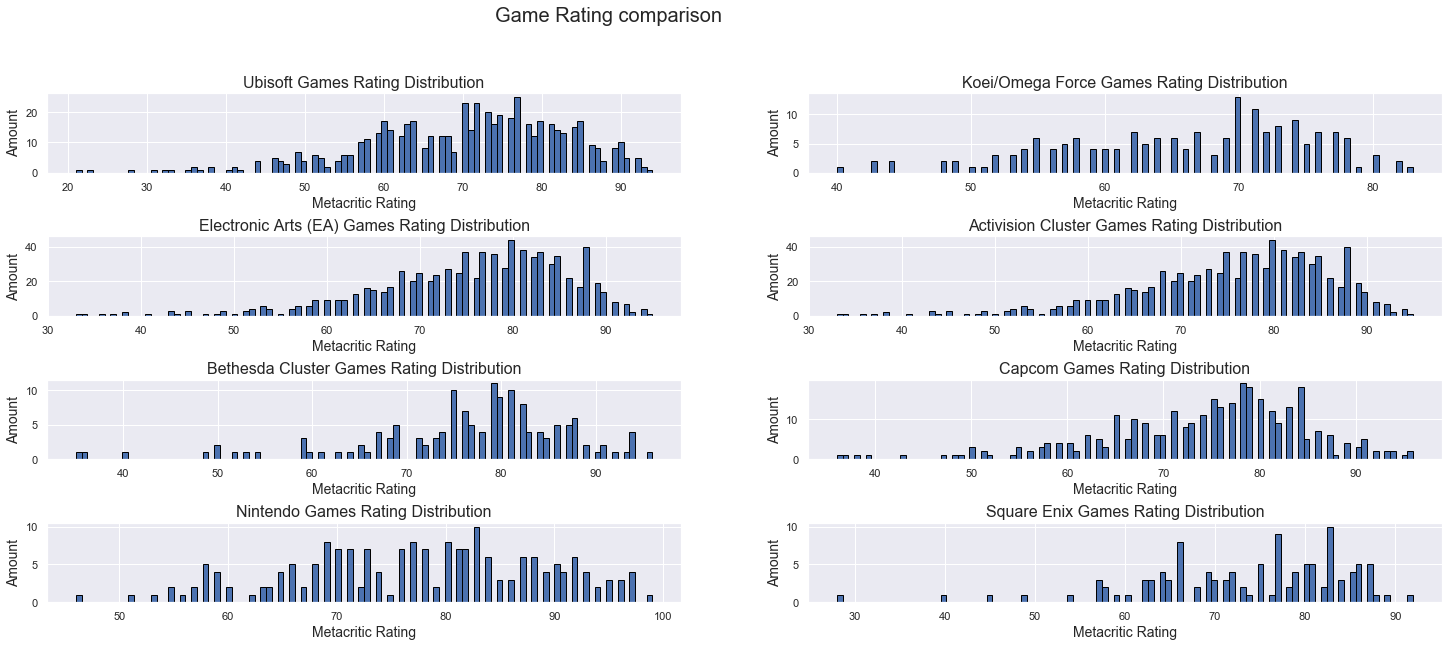

In [506]:
import matplotlib.pyplot as plt
import seaborn as sns

#fig = plt.figure(figsize=(20,12))
fig = plt.figure(figsize = (25, 12))

# Histogram of rating (Ubisoft)
hst1 = fig.add_subplot(521)
hst1.set_title('Ubisoft Games Rating Distribution',fontsize = 16)
hst1 = plt.hist(dtsc_ubi2['metascore'], edgecolor = "black", bins = 100)
plt.ylabel('Amount',fontsize = 14)
plt.xlabel('Metacritic Rating',fontsize = 14)

fig.suptitle('Game Rating comparison', fontsize = 20, horizontalalignment = 'right')

hst2 = fig.add_subplot(522)
hst2.set_title('Koei/Omega Force Games Rating Distribution',fontsize = 16)
hst2 = plt.hist(dtsc_dynasty['metascore'], edgecolor = "black", bins = 100)
plt.ylabel('Amount',fontsize = 14)
plt.xlabel('Metacritic Rating',fontsize = 14)

hst3 = fig.add_subplot(523)
hst3.set_title('Electronic Arts (EA) Games Rating Distribution',fontsize = 16)
hst3 = plt.hist(dtsc_ea['metascore'], edgecolor = "black", bins = 100)
plt.ylabel('Amount', fontsize = 14)
plt.xlabel('Metacritic Rating',fontsize = 14)

hst4 = fig.add_subplot(524)
hst4.set_title('Activision Cluster Games Rating Distribution',fontsize = 16)
hst4 = plt.hist(dtsc_ea['metascore'], edgecolor = "black", bins = 100)
plt.ylabel('Amount', fontsize = 14)
plt.xlabel('Metacritic Rating',fontsize = 14)

hst4 = fig.add_subplot(525)
hst4.set_title('Bethesda Cluster Games Rating Distribution',fontsize = 16)
hst4 = plt.hist(dtsc_bth['metascore'], edgecolor = "black", bins = 100)
plt.ylabel('Amount', fontsize = 14)
plt.xlabel('Metacritic Rating',fontsize = 14)

hst4 = fig.add_subplot(526)
hst4.set_title('Capcom Games Rating Distribution',fontsize = 16)
hst4 = plt.hist(dtsc_cpcm['metascore'], edgecolor = "black", bins = 100)
plt.ylabel('Amount', fontsize = 14)
plt.xlabel('Metacritic Rating',fontsize = 14)

hst4 = fig.add_subplot(527)
hst4.set_title('Nintendo Games Rating Distribution',fontsize = 16)
hst4 = plt.hist(dtsc_ntd['metascore'], edgecolor = "black", bins = 100)
plt.ylabel('Amount', fontsize = 14)
plt.xlabel('Metacritic Rating',fontsize = 14)

hst4 = fig.add_subplot(528)
hst4.set_title('Square Enix Games Rating Distribution',fontsize = 16)
hst4 = plt.hist(dtsc_sqe['metascore'], edgecolor = "black", bins = 100)
plt.ylabel('Amount', fontsize = 14)
plt.xlabel('Metacritic Rating',fontsize = 14)

plt.subplots_adjust(hspace = 0.8)

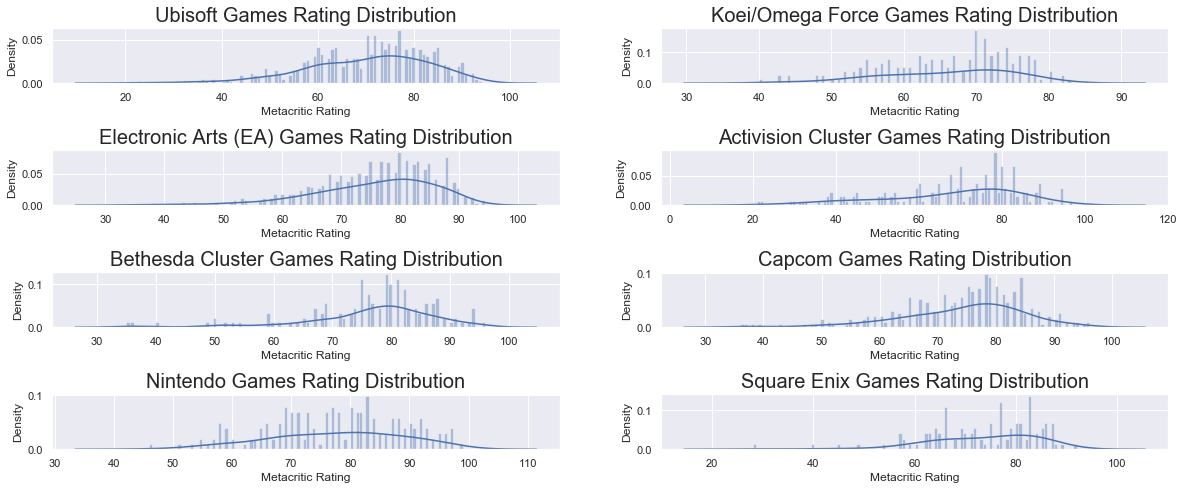

In [513]:
fig = plt.figure(figsize = (20, 10))

rx1 = fig.add_subplot(521)
rx1.set_title('Ubisoft Games Rating Distribution', fontsize=20)
rx1 = sns.distplot(dtsc_ubi2['metascore'], bins=100)
plt.ylabel('Density')
plt.xlabel('Metacritic Rating')

rx2 = fig.add_subplot(522)
rx2.set_title('Koei/Omega Force Games Rating Distribution', fontsize=20)
rx2 = sns.distplot(dtsc_dynasty['metascore'], bins=100)
plt.ylabel('Density')
plt.xlabel('Metacritic Rating')

rx3 = fig.add_subplot(523)
rx3.set_title('Electronic Arts (EA) Games Rating Distribution', fontsize=20)
rx3 = sns.distplot(dtsc_ea['metascore'], bins=100)
plt.ylabel('Density')
plt.xlabel('Metacritic Rating')

rx4 = fig.add_subplot(524)
rx4.set_title('Activision Cluster Games Rating Distribution', fontsize=20)
rx4 = sns.distplot(dtsc_actvsn['metascore'], bins=100)
plt.ylabel('Density')
plt.xlabel('Metacritic Rating')

rx5 = fig.add_subplot(525)
rx5.set_title('Bethesda Cluster Games Rating Distribution', fontsize=20)
rx5 = sns.distplot(dtsc_bth['metascore'], bins=100)
plt.ylabel('Density')
plt.xlabel('Metacritic Rating')

rx6 = fig.add_subplot(526)
rx6.set_title('Capcom Games Rating Distribution', fontsize=20)
rx6 = sns.distplot(dtsc_cpcm['metascore'], bins=100)
plt.ylabel('Density')
plt.xlabel('Metacritic Rating')

rx7 = fig.add_subplot(527)
rx7.set_title('Nintendo Games Rating Distribution', fontsize=20)
rx7 = sns.distplot(dtsc_ntd['metascore'], bins=100)
plt.ylabel('Density')
plt.xlabel('Metacritic Rating')

rx8 = fig.add_subplot(528)
rx8.set_title('Square Enix Games Rating Distribution', fontsize=20)
rx8 = sns.distplot(dtsc_sqe['metascore'], bins=100)
plt.ylabel('Density')
plt.xlabel('Metacritic Rating')

plt.subplots_adjust(hspace = 1.2)

Text(0, 0.5, 'Density')

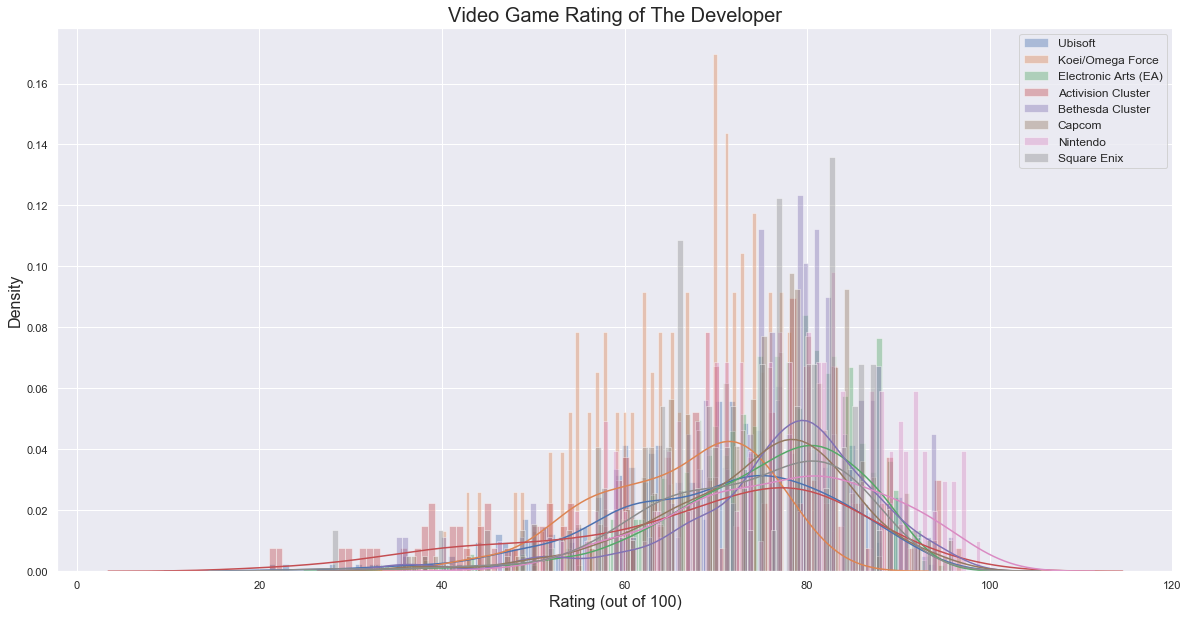

In [517]:
plt.figure(figsize=(20, 10))

sns.distplot(dtsc_ubi2['metascore'], bins=100, label='Ubisoft')
sns.distplot(dtsc_dynasty['metascore'], bins=100, label='Koei/Omega Force')
sns.distplot(dtsc_ea['metascore'], bins=100, label='Electronic Arts (EA)')
sns.distplot(dtsc_actvsn['metascore'], bins=100, label='Activision Cluster')
sns.distplot(dtsc_bth['metascore'], bins=100, label='Bethesda Cluster')
sns.distplot(dtsc_cpcm['metascore'], bins=100, label='Capcom')
sns.distplot(dtsc_ntd['metascore'], bins=100, label='Nintendo')
sns.distplot(dtsc_sqe['metascore'], bins=100, label='Square Enix')

plt.legend(prop={'size': 12})
plt.title('Video Game Rating of The Developer', fontsize=20)
plt.xlabel('Rating (out of 100)', fontsize=16)
plt.ylabel('Density', fontsize=16)

Text(0, 0.5, 'Rating Score (Metascore)')

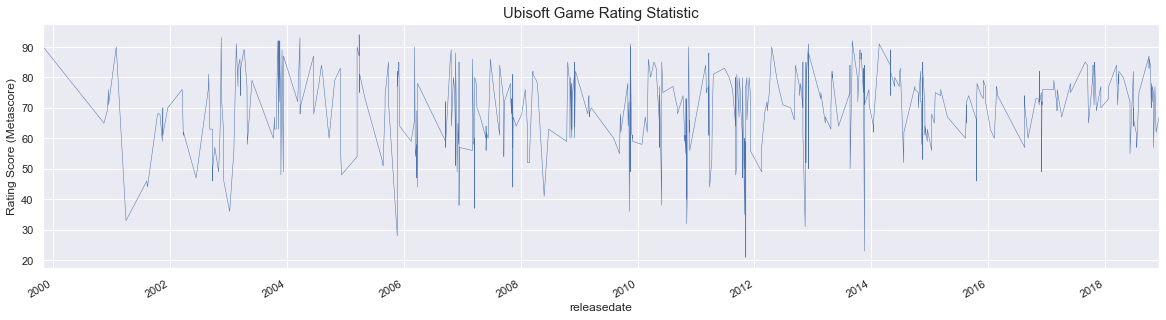

In [535]:
# Line graph for Ubisoft
dtsc_ubi2['releasedate'] = pd.to_datetime(dtsc_ubi2['releasedate'])
dtsc_ubi3 = dtsc_ubi2.set_index('releasedate')
sns.set(rc={'figure.figsize':(20, 5)})
mgscore = dtsc_ubi2['metascore']
dtsc_ubi3.loc['1995': '2018', 'metascore'].plot(linewidth=0.5);
plt.title('Ubisoft Game Rating Statistic', fontsize=15)
plt.ylabel("Rating Score (Metascore)")

Text(0, 0.5, 'Rating Score (Metascore)')

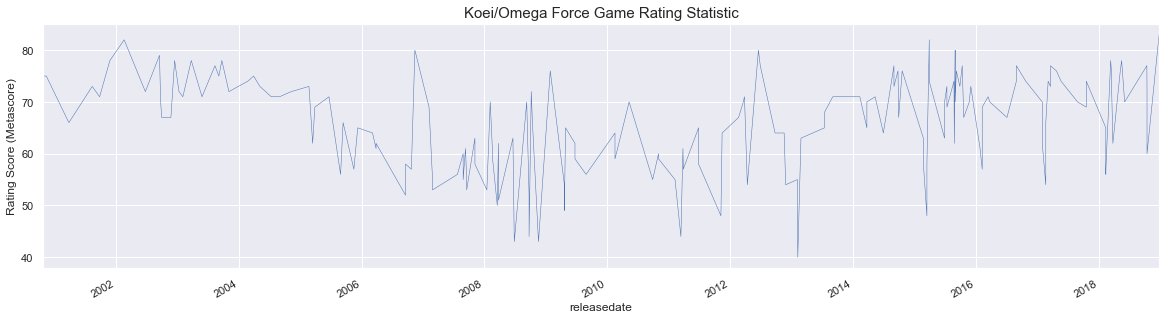

In [536]:
# Line graph for Koei/Omega Force
dtsc_dynasty['releasedate'] = pd.to_datetime(dtsc_dynasty['releasedate'])
dtsc_dynasty2 = dtsc_dynasty.set_index('releasedate')
sns.set(rc={'figure.figsize':(20, 5)})
mgscore = dtsc_dynasty['metascore']
dtsc_dynasty2.loc['1995': '2018', 'metascore'].plot(linewidth=0.5);
plt.title('Koei/Omega Force Game Rating Statistic', fontsize=15)
plt.ylabel("Rating Score (Metascore)")

Text(0, 0.5, 'Rating Score (Metascore)')

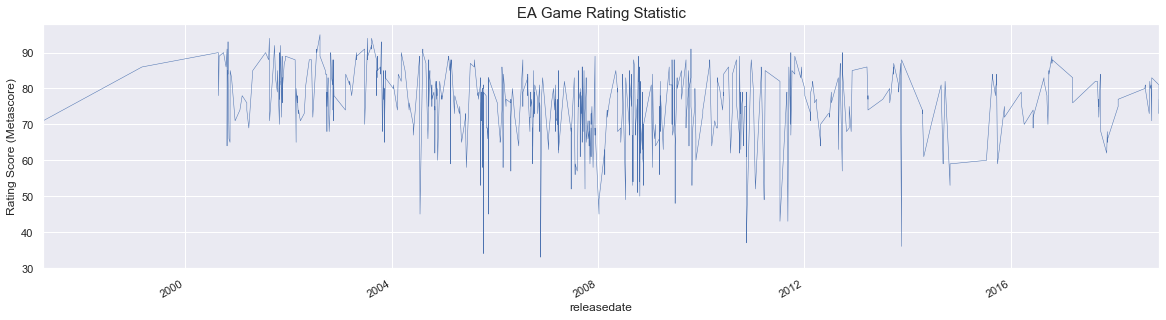

In [537]:
# Line graph for EA
dtsc_ea['releasedate'] = pd.to_datetime(dtsc_ea['releasedate'])
dtsc_ea4 = dtsc_ea.set_index('releasedate')
sns.set(rc={'figure.figsize':(20, 5)})
mgscore = dtsc_ea['metascore']
dtsc_ea4.loc['1995': '2018', 'metascore'].plot(linewidth=0.5);
plt.title('EA Game Rating Statistic', fontsize=15)
plt.ylabel("Rating Score (Metascore)")

C:\Users\Taryani\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, 'Rating Score (Metascore)')

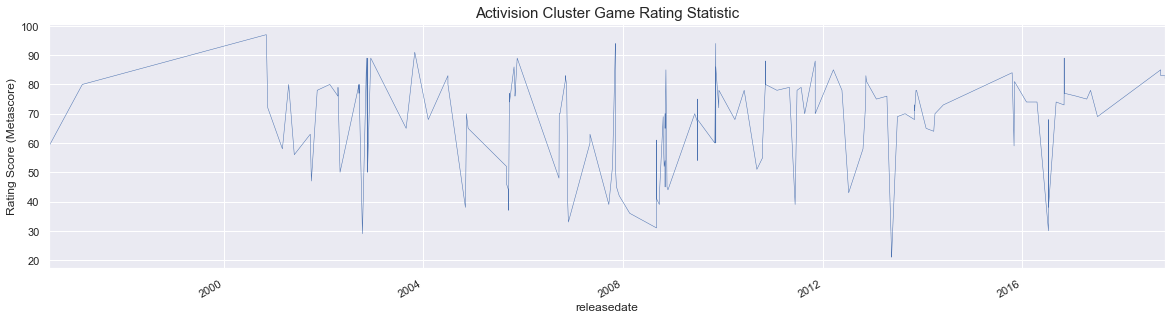

In [540]:
# Line graph for Koei/Omega Force
dtsc_actvsn['releasedate'] = pd.to_datetime(dtsc_actvsn['releasedate'])
dtsc_actvsn2 = dtsc_actvsn.set_index('releasedate')
sns.set(rc={'figure.figsize':(20, 5)})
mgscore = dtsc_actvsn['metascore']
dtsc_actvsn2.loc['1995': '2018', 'metascore'].plot(linewidth=0.5);
plt.title('Activision Cluster Game Rating Statistic', fontsize=15)
plt.ylabel("Rating Score (Metascore)")

C:\Users\Taryani\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, 'Rating Score (Metascore)')

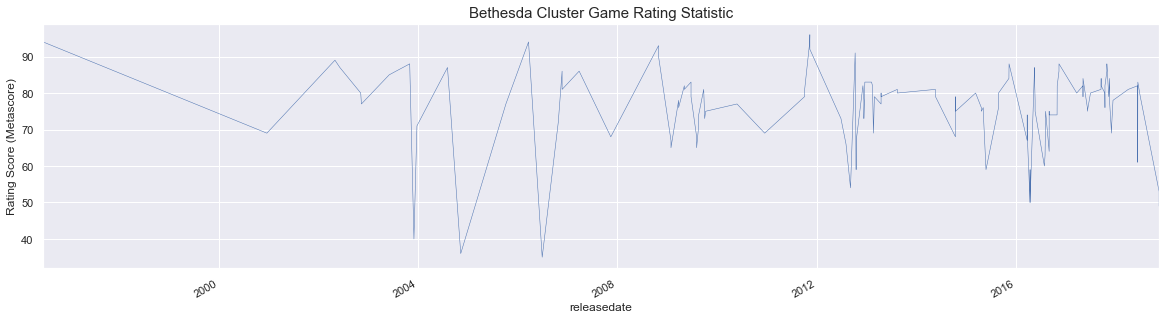

In [542]:
# Line graph for Bethesda
dtsc_bth['releasedate'] = pd.to_datetime(dtsc_bth['releasedate'])
dtsc_bth2 = dtsc_bth.set_index('releasedate')
sns.set(rc={'figure.figsize':(20, 5)})
mgscore = dtsc_bth['metascore']
dtsc_bth2.loc['1995': '2018', 'metascore'].plot(linewidth=0.5);
plt.title('Bethesda Cluster Game Rating Statistic', fontsize=15)
plt.ylabel("Rating Score (Metascore)")

C:\Users\Taryani\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, 'Rating Score (Metascore)')

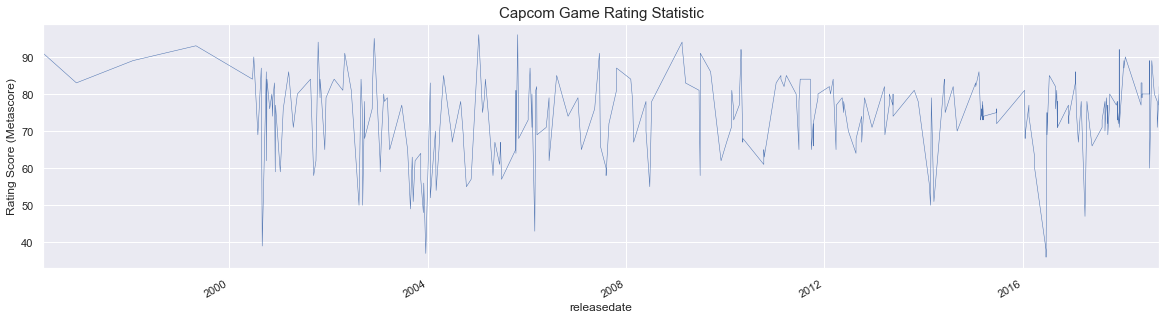

In [544]:
# Line graph for Koei/Omega Force
dtsc_cpcm['releasedate'] = pd.to_datetime(dtsc_cpcm['releasedate'])
dtsc_cpcm2 = dtsc_cpcm.set_index('releasedate')
sns.set(rc={'figure.figsize':(20, 5)})
mgscore = dtsc_cpcm['metascore']
dtsc_cpcm2.loc['1995': '2018', 'metascore'].plot(linewidth=0.5);
plt.title('Capcom Game Rating Statistic', fontsize=15)
plt.ylabel("Rating Score (Metascore)")

C:\Users\Taryani\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, 'Rating Score (Metascore)')

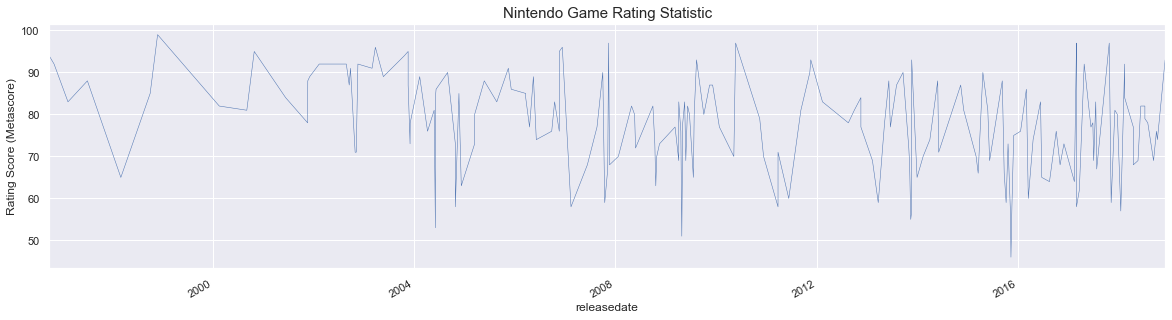

In [546]:
# Line graph for Koei/Omega Force
dtsc_ntd['releasedate'] = pd.to_datetime(dtsc_ntd['releasedate'])
dtsc_ntd2 = dtsc_ntd.set_index('releasedate')
sns.set(rc={'figure.figsize':(20, 5)})
mgscore = dtsc_ntd['metascore']
dtsc_ntd2.loc['1995': '2018', 'metascore'].plot(linewidth=0.5);
plt.title('Nintendo Game Rating Statistic', fontsize=15)
plt.ylabel("Rating Score (Metascore)")

C:\Users\Taryani\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, 'Rating Score (Metascore)')

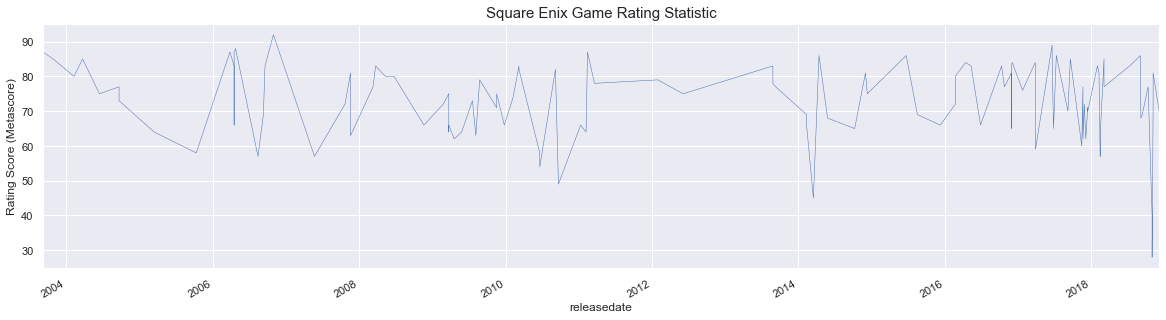

In [548]:
# Line graph for Koei/Omega Force
dtsc_sqe['releasedate'] = pd.to_datetime(dtsc_sqe['releasedate'])
dtsc_sqe2 = dtsc_sqe.set_index('releasedate')
sns.set(rc={'figure.figsize':(20, 5)})
mgscore = dtsc_sqe['metascore']
dtsc_sqe2.loc['1995': '2018', 'metascore'].plot(linewidth=0.5);
plt.title('Square Enix Game Rating Statistic', fontsize=15)
plt.ylabel("Rating Score (Metascore)")

In [720]:
#Change the dataframe into the np array, to be involved into Bayesian Optimization (BO)

x_ubi = np.array(dtsc_ubi2['metascore'])
x_dynasty = np.array(dtsc_dynasty['metascore'])
x_ea = np.array(dtsc_ea['metascore'])
x_actvsn = np.array(dtsc_actvsn['metascore'])
x_bth = np.array(dtsc_bth['metascore'])
x_cpcm = np.array(dtsc_cpcm['metascore'])
x_ntd = np.array(dtsc_ntd['metascore'])
x_sqe = np.array(dtsc_sqe['metascore'])

[90 76 71 69 65 90 70 70 68 68 61 59 46 44 33 93 81 76 76 72 66 64 63 63
 63 62 61 60 57 50 49 47 46 46 92 92 92 91 89 89 89 87 87 86 86 83 83 83
 79 77 77 76 75 75 74 73 73 72 67 63 63 63 60 58 56 49 48 36 93 87 87 84
 83 83 83 83 81 79 78 72 70 68 68 60 58 48 94 92 90 87 85 85 85 85 84 82
 82 81 81 80 77 75 74 73 73 72 70 64 59 54 52 51 28 90 89 88 85 85 84 80
 78 78 76 72 69 67 66 66 65 65 64 64 63 61 61 59 59 59 59 58 58 58 57 57
 54 51 49 47 44 38 86 86 84 81 81 80 79 78 78 76 73 73 72 72 71 70 70 68
 67 67 64 64 63 62 61 61 61 60 60 60 59 58 58 57 57 56 56 55 54 51 51 44
 42 37 85 85 85 85 82 82 81 81 80 79 78 78 77 76 76 73 70 70 68 64 64 63
 63 63 60 60 60 59 55 54 52 52 41 91 90 78 74 73 72 70 70 68 68 68 67 66
 64 62 62 61 60 60 60 59 55 49 36 90 89 86 85 85 83 80 77 77 75 75 74 74
 73 73 73 70 68 67 67 66 65 64 62 62 61 61 59 58 58 57 56 55 47 46 40 38
 32 88 84 83 81 81 80 80 80 80 80 80 80 79 77 77 77 76 76 75 75 74 70 67
 66 66 64 63 63 61 61 60 59 59 58 56 55 53 51 51 50

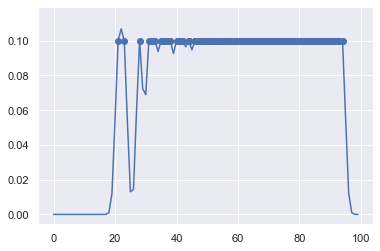

>x=32.000, f()=0.100000, actual=0.100
(UBISOFT) Best Result: x=90.000, y=0.100


In [745]:
# BO for Ubisoft Games

from math import sin
from math import pi
from numpy import arange
from numpy import vstack
from numpy import argmax
from numpy import asarray
from numpy.random import normal
from numpy.random import random
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings
from warnings import simplefilter
from matplotlib import pyplot

# objective function
def objective(x, noise=0.1):
    return (x**2 * sin(5 * pi * x)**6.0) + noise
#+ noise

# surrogate or approximation for the objective function
def surrogate(model, X):
	# catch any warning generated when making a prediction
	with catch_warnings():
		# ignore generated warnings
		simplefilter("ignore")
		return model.predict(X, return_std=True)

# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
	# calculate the best surrogate score found so far
	yhat, _ = surrogate(model, X)
	best = max(yhat)
	# calculate mean and stdev via surrogate function
	mu, std = surrogate(model, Xsamples)
	mu = mu[:, 0]
	# calculate the probability of improvement
	probs = norm.cdf((mu - best) / (std+1E-9))
	return probs

# optimize the acquisition function
def opt_acquisition(X, y, model):
    
	# [SAMPLE = UBISOFT GAME RATING SCORE]
	Xsamples = x_ubi
    
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	# calculate the acquisition function for each sample
	scores = acquisition(X, Xsamples, model)
	# locate the index of the largest scores
	ix = argmax(scores)
	return Xsamples[ix, 0]

# plot real observations vs surrogate function
def plot(X, y, model):
	# scatter plot of inputs and real objective function
	pyplot.scatter(X, y)
	# line plot of surrogate function across domain
	Xsamples = asarray(arange(0, 100, 1))
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	ysamples, _ = surrogate(model, Xsamples)
	pyplot.plot(Xsamples, ysamples)
	# show the plot
	pyplot.show()

# sample the domain sparsely with noise
X = x_ubi

print(X) #print the array (ubisoft game rating scores)
y = asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot before hand
plot(X, y, model)
# perform the optimization process
for i in range(1):
	# select the next point to sample
	x = opt_acquisition(X, y, model)
	# sample the point
	actual = objective(x)
	# summarize the finding
	est, _ = surrogate(model, [[x]])
	print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
	# add the data to the dataset
	X = vstack((X, [[x]]))
	y = vstack((y, [[actual]]))
	# update the model
	model.fit(X, y)

# best result
ix = argmax(y)
print('(UBISOFT) Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))

[75 75 78 73 71 66 82 79 78 72 70 67 67 78 78 77 75 72 72 71 71 75 74 73
 72 71 71 73 71 69 66 65 62 57 56 80 64 62 61 58 57 52 69 63 61 60 58 56
 55 55 55 53 53 72 70 70 66 63 62 60 59 53 52 51 50 44 43 43 76 65 62 59
 56 54 52 49 70 64 60 59 59 55 65 64 61 58 58 57 55 48 44 80 77 71 70 67
 64 64 54 54 71 68 65 63 55 49 40 77 76 76 76 73 71 71 70 69 68 67 67 65
 64 82 80 77 76 74 74 73 73 73 70 70 70 69 67 63 63 62 58 58 48 77 74 74
 71 70 69 67 61 57 77 76 74 74 74 73 70 70 69 66 62 54 83 78 78 77 76 75
 74 72 72 70 68 65 62 60 57 56]


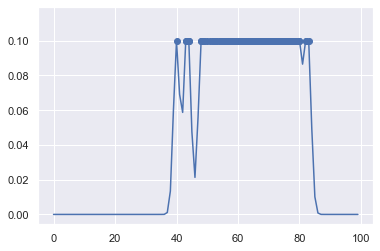

>x=49.000, f()=0.100000, actual=0.100
(KOEI/OMEGA FORCE) Best Result: x=75.000, y=0.100


In [746]:
# BO for Koei/Omega Force Games

# objective function
def objective(x, noise=0.1):
    return (x**2 * sin(5 * pi * x)**6.0) + noise
#+ noise

# surrogate or approximation for the objective function
def surrogate(model, X):
	# catch any warning generated when making a prediction
	with catch_warnings():
		# ignore generated warnings
		simplefilter("ignore")
		return model.predict(X, return_std=True)

# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
	# calculate the best surrogate score found so far
	yhat, _ = surrogate(model, X)
	best = max(yhat)
	# calculate mean and stdev via surrogate function
	mu, std = surrogate(model, Xsamples)
	mu = mu[:, 0]
	# calculate the probability of improvement
	probs = norm.cdf((mu - best) / (std+1E-9))
	return probs

# optimize the acquisition function
def opt_acquisition(X, y, model):
    
	# [SAMPLE = KOEI/OMEGA FORCE GAME RATING SCORE]
	Xsamples = x_dynasty
    
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	# calculate the acquisition function for each sample
	scores = acquisition(X, Xsamples, model)
	# locate the index of the largest scores
	ix = argmax(scores)
	return Xsamples[ix, 0]

# plot real observations vs surrogate function
def plot(X, y, model):
	# scatter plot of inputs and real objective function
	pyplot.scatter(X, y)
	# line plot of surrogate function across domain
	Xsamples = asarray(arange(0, 100, 1))
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	ysamples, _ = surrogate(model, Xsamples)
	pyplot.plot(Xsamples, ysamples)
	# show the plot
	pyplot.show()

# sample the domain sparsely with noise
X = x_dynasty
print(X) #print the array (ubisoft game rating scores)
y = asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot before hand
plot(X, y, model)
# perform the optimization process
for i in range(1):
	# select the next point to sample
	x = opt_acquisition(X, y, model)
	# sample the point
	actual = objective(x)
	# summarize the finding
	est, _ = surrogate(model, [[x]])
	print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
	# add the data to the dataset
	X = vstack((X, [[x]]))
	y = vstack((y, [[actual]]))
	# update the model
	model.fit(X, y)

# best result
ix = argmax(y)
print('(KOEI/OMEGA FORCE) Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))

[64 85 76 70 69 78 78 76 74 73 71 71 65 91 90 89 88 83 83 74 70 69 69 68
 71 70 70 69 68 68 66 77 77 75 78 75 73 71 68 64 63 59 75 70 70 69 67 62
 54 53 80 79 78 78 74 74 72 71 70 70 70 68 63 58 57 53 88 88 83 75 70 69
 69 67 66 65 64 62 41 90 90 89 86 86 85 80 80 70 43 90 88 86 84 83 79 77
 75 69 68 57 81 80 82 62 77 71 86 93 91 90 90 89 86 85 85 85 84 83 78 71
 66 65 94 92 92 90 90 89 89 88 88 87 87 85 83 83 82 82 81 81 81 79 78 77
 76 74 74 73 72 71 95 92 92 91 91 90 90 89 88 88 88 88 88 88 88 86 85 84
 84 83 83 82 82 81 80 80 80 80 79 79 78 78 75 75 74 73 73 72 68 68 94 94
 94 93 92 92 92 91 89 89 89 89 88 88 87 86 85 85 85 85 85 85 85 84 84 84
 84 83 83 82 82 81 81 80 78 78 78 77 68 68 65 91 91 90 90 90 89 89 88 88
 88 88 88 87 86 85 85 85 84 84 84 83 83 82 82 82 82 81 81 81 81 80 80 80
 79 78 78 78 77 77 77 77 77 76 76 75 75 75 75 74 74 74 73 70 67 67 66 62
 61 60 60 45 89 89 88 88 88 88 88 87 87 87 87 86 86 85 85 83 83 83 82 82
 81 81 81 80 80 80 80 80 80 80 79 79 79 79 78 78 65

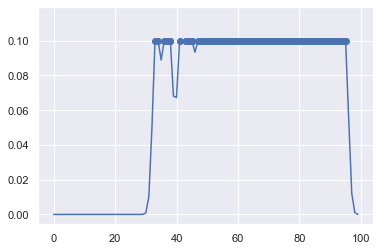

>x=37.000, f()=0.100000, actual=0.100
(EA) Best Result: x=64.000, y=0.100


In [747]:
# BO for EA Games

# objective function
def objective(x, noise=0.1):
    return (x**2 * sin(5 * pi * x)**6.0) + noise
#+ noise

# surrogate or approximation for the objective function
def surrogate(model, X):
	# catch any warning generated when making a prediction
	with catch_warnings():
		# ignore generated warnings
		simplefilter("ignore")
		return model.predict(X, return_std=True)

# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
	# calculate the best surrogate score found so far
	yhat, _ = surrogate(model, X)
	best = max(yhat)
	# calculate mean and stdev via surrogate function
	mu, std = surrogate(model, Xsamples)
	mu = mu[:, 0]
	# calculate the probability of improvement
	probs = norm.cdf((mu - best) / (std+1E-9))
	return probs

# optimize the acquisition function
def opt_acquisition(X, y, model):
    
	# [SAMPLE = EA GAME RATING SCORE]
	Xsamples = x_ea
    
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	# calculate the acquisition function for each sample
	scores = acquisition(X, Xsamples, model)
	# locate the index of the largest scores
	ix = argmax(scores)
	return Xsamples[ix, 0]

# plot real observations vs surrogate function
def plot(X, y, model):
	# scatter plot of inputs and real objective function
	pyplot.scatter(X, y)
	# line plot of surrogate function across domain
	Xsamples = asarray(arange(0, 100, 1))
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	ysamples, _ = surrogate(model, Xsamples)
	pyplot.plot(Xsamples, ysamples)
	# show the plot
	pyplot.show()

# sample the domain sparsely with noise
X = x_ea
print(X) #print the array (ubisoft game rating scores)
y = asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot before hand
plot(X, y, model)
# perform the optimization process
for i in range(1):
	# select the next point to sample
	x = opt_acquisition(X, y, model)
	# sample the point
	actual = objective(x)
	# summarize the finding
	est, _ = surrogate(model, [[x]])
	print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
	# add the data to the dataset
	X = vstack((X, [[x]]))
	y = vstack((y, [[actual]]))
	# update the model
	model.fit(X, y)

# best result
ix = argmax(y)
print('(EA) Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))

[59 80 97 72 80 78 63 58 56 47 89 89 89 80 80 80 79 77 76 76 54 53 50 50
 29 91 65 83 80 80 70 68 65 64 59 59 38 89 86 78 77 77 76 76 74 52 46 44
 37 83 82 82 80 70 70 68 53 48 41 33 94 94 92 63 60 52 51 45 42 39 85 84
 83 70 69 68 67 65 65 63 61 54 52 45 45 44 42 41 39 36 31 94 94 86 78 76
 75 72 70 68 67 67 60 60 54 88 87 81 80 78 68 60 55 51 88 88 79 79 78 78
 78 70 70 39 85 83 83 81 78 74 58 43 78 78 76 75 73 71 70 69 69 68 22 21
 73 70 65 64 84 81 81 73 60 59 89 86 83 78 77 74 74 74 73 68 38 32 30 78
 76 75 69 85 83 83 83 82]


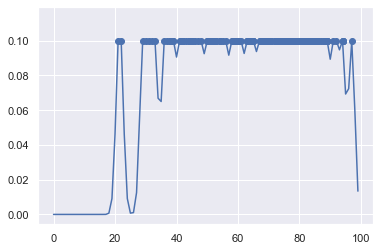

>x=30.000, f()=0.100000, actual=0.100
(ACTIVISION CLUSTER) Best Result: x=59.000, y=0.100


In [749]:
# BO for Activision Cluster Games

# objective function
def objective(x, noise=0.1):
    return (x**2 * sin(5 * pi * x)**6.0) + noise
#+ noise

# surrogate or approximation for the objective function
def surrogate(model, X):
	# catch any warning generated when making a prediction
	with catch_warnings():
		# ignore generated warnings
		simplefilter("ignore")
		return model.predict(X, return_std=True)

# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
	# calculate the best surrogate score found so far
	yhat, _ = surrogate(model, X)
	best = max(yhat)
	# calculate mean and stdev via surrogate function
	mu, std = surrogate(model, Xsamples)
	mu = mu[:, 0]
	# calculate the probability of improvement
	probs = norm.cdf((mu - best) / (std+1E-9))
	return probs

# optimize the acquisition function
def opt_acquisition(X, y, model):
    
	# [SAMPLE = ACTIVISION CLUSTER GAME RATING SCORE]
	Xsamples = x_actvsn
    
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	# calculate the acquisition function for each sample
	scores = acquisition(X, Xsamples, model)
	# locate the index of the largest scores
	ix = argmax(scores)
	return Xsamples[ix, 0]

# plot real observations vs surrogate function
def plot(X, y, model):
	# scatter plot of inputs and real objective function
	pyplot.scatter(X, y)
	# line plot of surrogate function across domain
	Xsamples = asarray(arange(0, 100, 1))
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	ysamples, _ = surrogate(model, Xsamples)
	pyplot.plot(Xsamples, ysamples)
	# show the plot
	pyplot.show()

# sample the domain sparsely with noise
X = x_actvsn
print(X) #print the array (ubisoft game rating scores)
y = asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot before hand
plot(X, y, model)
# perform the optimization process
for i in range(1):
	# select the next point to sample
	x = opt_acquisition(X, y, model)
	# sample the point
	actual = objective(x)
	# summarize the finding
	est, _ = surrogate(model, [[x]])
	print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
	# add the data to the dataset
	X = vstack((X, [[x]]))
	y = vstack((y, [[actual]]))
	# update the model
	model.fit(X, y)

# best result
ix = argmax(y)
print('(ACTIVISION CLUSTER) Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))

[94 69 89 87 80 77 88 85 71 40 87 36 77 94 94 86 81 72 35 86 86 68 93 91
 90 83 82 81 81 79 78 76 75 74 73 72 71 68 67 65 65 77 69 96 94 92 81 81
 79 91 89 88 83 82 78 75 73 73 67 67 66 59 54 83 82 81 80 80 79 79 77 69
 81 79 79 79 75 68 88 87 84 80 80 80 76 76 76 76 75 75 59 88 88 87 86 85
 85 82 81 79 78 75 75 75 74 74 74 69 67 64 63 60 59 50 50 88 87 86 84 84
 84 82 82 82 81 80 80 80 79 79 78 77 76 76 75 71 69 83 82 81 79 75 61 53
 52 49]


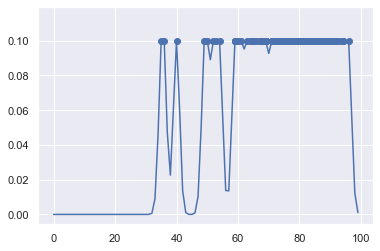

>x=53.000, f()=0.100000, actual=0.100
(BETHESDA CLUSTER) Best Result: x=94.000, y=0.100


In [754]:
# BO for Bethesda Cluster Games

# objective function
def objective(x, noise=0.1):
    return (x**2 * sin(5 * pi * x)**6.0) + noise
#+ noise

# surrogate or approximation for the objective function
def surrogate(model, X):
	# catch any warning generated when making a prediction
	with catch_warnings():
		# ignore generated warnings
		simplefilter("ignore")
		return model.predict(X, return_std=True)

# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
	# calculate the best surrogate score found so far
	yhat, _ = surrogate(model, X)
	best = max(yhat)
	# calculate mean and stdev via surrogate function
	mu, std = surrogate(model, Xsamples)
	mu = mu[:, 0]
	# calculate the probability of improvement
	probs = norm.cdf((mu - best) / (std+1E-9))
	return probs

# optimize the acquisition function
def opt_acquisition(X, y, model):
    
	# [SAMPLE = BETHESDA GAME RATING SCORE]
	Xsamples = x_bth
    
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	# calculate the acquisition function for each sample
	scores = acquisition(X, Xsamples, model)
	# locate the index of the largest scores
	ix = argmax(scores)
	return Xsamples[ix, 0]

# plot real observations vs surrogate function
def plot(X, y, model):
	# scatter plot of inputs and real objective function
	pyplot.scatter(X, y)
	# line plot of surrogate function across domain
	Xsamples = asarray(arange(0, 100, 1))
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	ysamples, _ = surrogate(model, Xsamples)
	pyplot.plot(Xsamples, ysamples)
	# show the plot
	pyplot.show()

# sample the domain sparsely with noise
X = x_bth
print(X) #print the array (ubisoft game rating scores)
y = asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot before hand
plot(X, y, model)
# perform the optimization process
for i in range(1):
	# select the next point to sample
	x = opt_acquisition(X, y, model)
	# sample the point
	actual = objective(x)
	# summarize the finding
	est, _ = surrogate(model, [[x]])
	print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
	# add the data to the dataset
	X = vstack((X, [[x]]))
	y = vstack((y, [[actual]]))
	# update the model
	model.fit(X, y)

# best result
ix = argmax(y)
print('(BETHESDA CLUSTER) Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))

[91 83 89 93 90 87 86 84 84 83 80 79 77 76 74 69 62 59 39 94 86 84 84 81
 80 79 79 76 71 65 62 59 58 95 91 84 84 83 83 81 81 78 76 73 68 50 50 80
 79 78 77 68 66 65 65 64 63 62 62 59 57 56 51 49 48 37 85 83 78 71 70 68
 68 67 67 65 57 55 54 52 96 96 84 81 79 75 74 68 67 67 66 65 65 64 61 58
 57 87 85 82 81 80 79 79 75 75 74 73 71 71 69 63 62 43 91 87 81 79 76 76
 72 66 65 60 60 58 84 84 78 78 78 70 67 55 55 94 93 91 86 84 83 81 76 62
 59 58 92 91 84 81 79 79 78 77 76 73 71 68 68 67 67 65 63 61 85 85 84 84
 84 84 83 82 80 80 79 78 72 72 67 66 65 65 84 83 82 80 79 79 78 77 75 74
 74 71 70 68 67 65 64 82 81 80 80 79 78 77 77 75 74 69 84 83 82 79 75 70
 56 51 50 86 83 82 82 78 77 76 76 75 75 75 75 75 75 74 74 74 73 73 73 73
 72 85 82 81 81 78 77 77 76 75 74 74 72 71 71 70 69 69 68 63 60 38 36 92
 87 87 86 86 83 80 79 78 78 78 78 78 78 77 77 76 76 75 75 73 73 72 72 72
 71 71 71 70 69 67 66 47 90 90 89 89 89 88 87 86 84 83 83 82 81 80 80 80
 80 80 79 79 78 77 77 77 76 71 63 60]


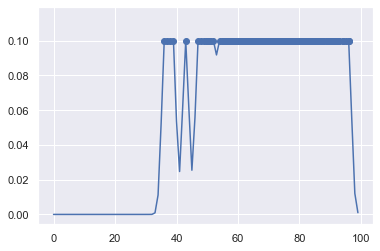

>x=78.000, f()=0.100000, actual=0.100
(CAPCOM) Best Result: x=91.000, y=0.100


In [752]:
# BO for Capcom Cluster Games

# objective function
def objective(x, noise=0.1):
    return (x**2 * sin(5 * pi * x)**6.0) + noise
#+ noise

# surrogate or approximation for the objective function
def surrogate(model, X):
	# catch any warning generated when making a prediction
	with catch_warnings():
		# ignore generated warnings
		simplefilter("ignore")
		return model.predict(X, return_std=True)

# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
	# calculate the best surrogate score found so far
	yhat, _ = surrogate(model, X)
	best = max(yhat)
	# calculate mean and stdev via surrogate function
	mu, std = surrogate(model, Xsamples)
	mu = mu[:, 0]
	# calculate the probability of improvement
	probs = norm.cdf((mu - best) / (std+1E-9))
	return probs

# optimize the acquisition function
def opt_acquisition(X, y, model):
    
	# [SAMPLE = CAPCOM GAME RATING SCORE]
	Xsamples = x_cpcm
    
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	# calculate the acquisition function for each sample
	scores = acquisition(X, Xsamples, model)
	# locate the index of the largest scores
	ix = argmax(scores)
	return Xsamples[ix, 0]

# plot real observations vs surrogate function
def plot(X, y, model):
	# scatter plot of inputs and real objective function
	pyplot.scatter(X, y)
	# line plot of surrogate function across domain
	Xsamples = asarray(arange(0, 100, 1))
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	ysamples, _ = surrogate(model, Xsamples)
	pyplot.plot(Xsamples, ysamples)
	# show the plot
	pyplot.show()

# sample the domain sparsely with noise
X = x_cpcm
print(X) #print the array (ubisoft game rating scores)
y = asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot before hand
plot(X, y, model)
# perform the optimization process
for i in range(1):
	# select the next point to sample
	x = opt_acquisition(X, y, model)
	# sample the point
	actual = objective(x)
	# summarize the finding
	est, _ = surrogate(model, [[x]])
	print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
	# add the data to the dataset
	X = vstack((X, [[x]]))
	y = vstack((y, [[actual]]))
	# update the model
	model.fit(X, y)

# best result
ix = argmax(y)
print('(CAPCOM) Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))

[94 92 88 83 99 85 65 95 82 81 89 88 84 80 78 92 92 92 91 87 71 71 96 95
 94 91 89 87 78 73 90 89 86 85 84 84 81 76 73 66 66 66 63 58 55 53 91 88
 86 83 83 83 80 73 96 95 89 85 84 83 77 76 76 74 97 90 77 68 68 67 59 58
 82 82 80 73 73 72 70 70 63 93 87 87 83 83 82 80 80 80 78 77 76 71 69 69
 65 51 97 79 77 70 70 93 90 81 71 71 71 60 58 84 83 81 78 77 93 91 90 88
 87 78 77 72 69 68 65 59 57 55 88 87 81 74 71 70 90 88 81 75 73 70 70 69
 66 66 59 58 56 46 86 83 76 76 74 73 68 65 64 60 97 97 96 92 83 81 80 80
 78 77 69 69 67 64 62 59 58 93 92 84 82 82 82 79 78 77 76 74 69 69 68 57]


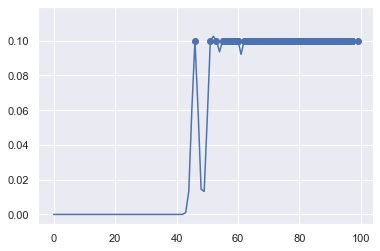

>x=83.000, f()=0.100000, actual=0.100
(NINTENDO) Best Result: x=94.000, y=0.100


In [753]:
# BO for Nintendo Cluster Games

# objective function
def objective(x, noise=0.1):
    return (x**2 * sin(5 * pi * x)**6.0) + noise
#+ noise

# surrogate or approximation for the objective function
def surrogate(model, X):
	# catch any warning generated when making a prediction
	with catch_warnings():
		# ignore generated warnings
		simplefilter("ignore")
		return model.predict(X, return_std=True)

# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
	# calculate the best surrogate score found so far
	yhat, _ = surrogate(model, X)
	best = max(yhat)
	# calculate mean and stdev via surrogate function
	mu, std = surrogate(model, Xsamples)
	mu = mu[:, 0]
	# calculate the probability of improvement
	probs = norm.cdf((mu - best) / (std+1E-9))
	return probs

# optimize the acquisition function
def opt_acquisition(X, y, model):
    
	# [SAMPLE = NINTENDO GAME RATING SCORE]
	Xsamples = x_ntd
    
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	# calculate the acquisition function for each sample
	scores = acquisition(X, Xsamples, model)
	# locate the index of the largest scores
	ix = argmax(scores)
	return Xsamples[ix, 0]

# plot real observations vs surrogate function
def plot(X, y, model):
	# scatter plot of inputs and real objective function
	pyplot.scatter(X, y)
	# line plot of surrogate function across domain
	Xsamples = asarray(arange(0, 100, 1))
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	ysamples, _ = surrogate(model, Xsamples)
	pyplot.plot(Xsamples, ysamples)
	# show the plot
	pyplot.show()

# sample the domain sparsely with noise
X = x_ntd
print(X) #print the array (ubisoft game rating scores)
y = asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot before hand
plot(X, y, model)
# perform the optimization process
for i in range(1):
	# select the next point to sample
	x = opt_acquisition(X, y, model)
	# sample the point
	actual = objective(x)
	# summarize the finding
	est, _ = surrogate(model, [[x]])
	print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
	# add the data to the dataset
	X = vstack((X, [[x]]))
	y = vstack((y, [[actual]]))
	# update the model
	model.fit(X, y)

# best result
ix = argmax(y)
print('(NINTENDO) Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))

[87 85 85 80 77 75 73 64 58 92 88 87 87 83 83 69 66 57 81 72 63 57 83 80
 80 77 66 79 75 75 73 72 71 66 66 64 64 63 62 83 82 82 74 58 54 49 87 78
 66 64 79 79 75 83 78 77 86 81 75 69 68 66 65 45 86 86 69 66 84 84 83 83
 83 81 80 77 77 77 72 66 65 89 87 86 85 84 77 76 72 71 70 70 65 62 62 60
 59 86 85 83 83 81 81 80 79 77 77 71 70 69 68 63 57 40 28]


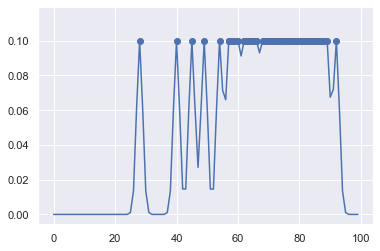

>x=63.000, f()=0.100000, actual=0.100
(SQUARE ENIX) Best Result: x=87.000, y=0.100


In [755]:
# BO for Square Enix Cluster Games

# objective function
def objective(x, noise=0.1):
    return (x**2 * sin(5 * pi * x)**6.0) + noise
#+ noise

# surrogate or approximation for the objective function
def surrogate(model, X):
	# catch any warning generated when making a prediction
	with catch_warnings():
		# ignore generated warnings
		simplefilter("ignore")
		return model.predict(X, return_std=True)

# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
	# calculate the best surrogate score found so far
	yhat, _ = surrogate(model, X)
	best = max(yhat)
	# calculate mean and stdev via surrogate function
	mu, std = surrogate(model, Xsamples)
	mu = mu[:, 0]
	# calculate the probability of improvement
	probs = norm.cdf((mu - best) / (std+1E-9))
	return probs

# optimize the acquisition function
def opt_acquisition(X, y, model):
    
	# [SAMPLE = SQUARE ENIX GAME RATING SCORE]
	Xsamples = x_sqe
    
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	# calculate the acquisition function for each sample
	scores = acquisition(X, Xsamples, model)
	# locate the index of the largest scores
	ix = argmax(scores)
	return Xsamples[ix, 0]

# plot real observations vs surrogate function
def plot(X, y, model):
	# scatter plot of inputs and real objective function
	pyplot.scatter(X, y)
	# line plot of surrogate function across domain
	Xsamples = asarray(arange(0, 100, 1))
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	ysamples, _ = surrogate(model, Xsamples)
	pyplot.plot(Xsamples, ysamples)
	# show the plot
	pyplot.show()

# sample the domain sparsely with noise
X = x_sqe
print(X) #print the array (ubisoft game rating scores)
y = asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot before hand
plot(X, y, model)
# perform the optimization process
for i in range(1):
	# select the next point to sample
	x = opt_acquisition(X, y, model)
	# sample the point
	actual = objective(x)
	# summarize the finding
	est, _ = surrogate(model, [[x]])
	print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
	# add the data to the dataset
	X = vstack((X, [[x]]))
	y = vstack((y, [[actual]]))
	# update the model
	model.fit(X, y)

# best result
ix = argmax(y)
print('(SQUARE ENIX) Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))

In [ ]:
# The following section is for PC Games

In [805]:
# PC GAMES DATA (1995-2018)

dtsc = pd.read_csv('ReviewGameMetacritic_clean.csv')
dtsc_pc = dtsc[dtsc.platform == "PC"]
dtsc_pc

,platform,developer,releasedate,metascore
0,PC,Westwood Studios,31-Aug-95,94
1,PC,LucasArts,30-Apr-95,86
3,PC,MPS Labs,29-Feb-96,94
4,PC,id Software,22-Jun-96,94
5,PC,Blizzard Entertainment,31-Dec-96,94
11,PC,Westwood Studios,31-Oct-96,90
13,PC,Legend Entertainment,31-Aug-96,89
14,PC,3D Realms,29-Jan-96,89
15,PC,Parallax Software,29-Feb-96,89
16,PC,Rocket Science Games,31-Dec-96,85


In [806]:
# AVERAGE RATING OF PC GAMES (1995-2018)
dtsc_pc.loc[:, 'releasedate'] = pd.to_datetime(dtsc_pc['releasedate'])
dtsc_pc['metascore'].mean()

70.18334254652663

In [807]:
base_data = "metascore"
data_p= 70.18334254652663
dtsc_pc.loc[:,"Prediksi"] = np.where( dtsc_pc[base_data] > data_p,"Above Average","Below Average")

print(dtsc_pc["Prediksi"])

0        Above Average
1        Above Average
3        Above Average
4        Above Average
5        Above Average
11       Above Average
13       Above Average
14       Above Average
15       Above Average
16       Above Average
17       Above Average
19       Above Average
21       Above Average
22       Above Average
24       Above Average
25       Above Average
26       Below Average
27       Below Average
28       Below Average
31       Above Average
34       Above Average
36       Above Average
38       Above Average
39       Above Average
42       Above Average
48       Above Average
52       Above Average
53       Above Average
54       Above Average
56       Above Average
             ...      
20182    Below Average
20186    Below Average
20189    Below Average
20192    Below Average
20198    Below Average
20202    Below Average
20207    Below Average
20208    Below Average
20236    Below Average
20242    Below Average
20243    Below Average
20248    Below Average
20253    Be

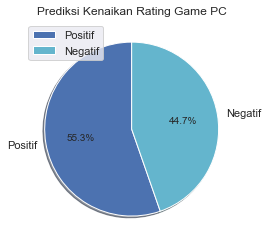

In [808]:
# PREDICTION OF PC GAME RATING FROM WHOLE PERIOD OF DATA (1995-2018)
counts = ct(dtsc_pc["Prediksi"])
count_p = counts['Above Average']
count_n = counts['Below Average']
slices = [count_p,count_n]
cols = ['b','c']
plt.pie(slices, labels=['Positif','Negatif'],colors = cols,shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Prediksi Kenaikan Rating Game PC")
plt.legend()
plt.show()

In [809]:
# PC GAMES RATING DATA (2015-2018)
dtsc_pc1518 = dtsc_pc[dtsc_pc.releasedate >= "2015"]
dtsc_pc1518

,platform,developer,releasedate,metascore,Prediksi
1046,PC,Sabotage Studio,2018-08-30,83,Above Average
1047,PC,Sabotage Studio,2018-08-30,83,Above Average
4095,PC,EA DICE,2017-11-17,65,Below Average
4096,PC,EA DICE,2017-11-17,65,Below Average
14431,PC,Rockstar North,2015-04-13,96,Above Average
14433,PC,Larian Studios Games,2015-10-27,94,Above Average
14434,PC,CD Projekt Red Studio,2015-05-18,93,Above Average
14440,PC,tobyfox,2015-09-15,92,Above Average
14443,PC,Kojima Productions,2015-09-01,91,Above Average
14444,PC,Out Of The Park Developments,2015-03-23,91,Above Average


In [810]:
print('PC GAMES RATING MEAN (2015-2018) : ', dtsc_pc1518['metascore'].mean())

PC GAMES RATING MEAN (2015-2018) :  71.47671840354768


In [811]:
data_p= 71.47671840354768
dtsc_pc1518.loc[:,"Prediksi"] = np.where( dtsc_pc1518[base_data] > data_p,"Above Average","Below Average")

print(dtsc_pc1518["Prediksi"])

1046     Above Average
1047     Above Average
4095     Below Average
4096     Below Average
14431    Above Average
14433    Above Average
14434    Above Average
14440    Above Average
14443    Above Average
14444    Above Average
14451    Above Average
14453    Above Average
14455    Above Average
14461    Above Average
14464    Above Average
14468    Above Average
14471    Above Average
14473    Above Average
14474    Above Average
14476    Above Average
14485    Above Average
14488    Above Average
14490    Above Average
14494    Above Average
14495    Above Average
14501    Above Average
14507    Above Average
14508    Above Average
14510    Above Average
14512    Above Average
             ...      
20182    Below Average
20186    Below Average
20189    Below Average
20192    Below Average
20198    Below Average
20202    Below Average
20207    Below Average
20208    Below Average
20236    Below Average
20242    Below Average
20243    Below Average
20248    Below Average
20253    Be

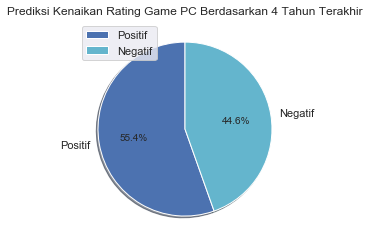

In [815]:
# PREDICTION OF PC GAME RATING FROM 4 LAST YEARS (2015-2018)
counts = ct(dtsc_pc1518["Prediksi"])
count_p = counts['Above Average']
count_n = counts['Below Average']
slices = [count_p,count_n]
cols = ['b','c']
plt.pie(slices, labels=['Positif','Negatif'],colors = cols,shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Prediksi Kenaikan Rating Game PC Berdasarkan 4 Tahun Terakhir")
plt.legend()
plt.show()